Mohamed Ali BARDI

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [82]:
data = pd.read_csv("/content/housing_price_dataset.csv")

In [83]:
data.rename(columns= {'SquareFeet': 'SquareMeters'}, inplace=True)
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareMeters  50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


In [84]:
data_enc = pd.get_dummies(data, columns=['Neighborhood'], dtype=int)
data_enc.head()

,SquareMeters,Bedrooms,Bathrooms,YearBuilt,Price,Neighborhood_Rural,Neighborhood_Suburb,Neighborhood_Urban
0,2126,4,1,1969,215355.283618,1,0,0
1,2459,3,2,1980,195014.221626,1,0,0
2,1860,2,1,1970,306891.012076,0,1,0
3,2294,2,1,1996,206786.787153,0,0,1
4,2130,5,2,2001,272436.239065,0,1,0


In [85]:
X = data_enc.drop(['Price'],axis=1)
y = data_enc['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

👇 Combined X_train and y_train for the sake of exploring data and analysing correlations


array([[<Axes: title={'center': 'SquareMeters'}>,
        <Axes: title={'center': 'Bedrooms'}>,
        <Axes: title={'center': 'Bathrooms'}>],
       [<Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'Neighborhood_Rural'}>,
        <Axes: title={'center': 'Neighborhood_Suburb'}>],
       [<Axes: title={'center': 'Neighborhood_Urban'}>,
        <Axes: title={'center': 'Price'}>, <Axes: >]], dtype=object)

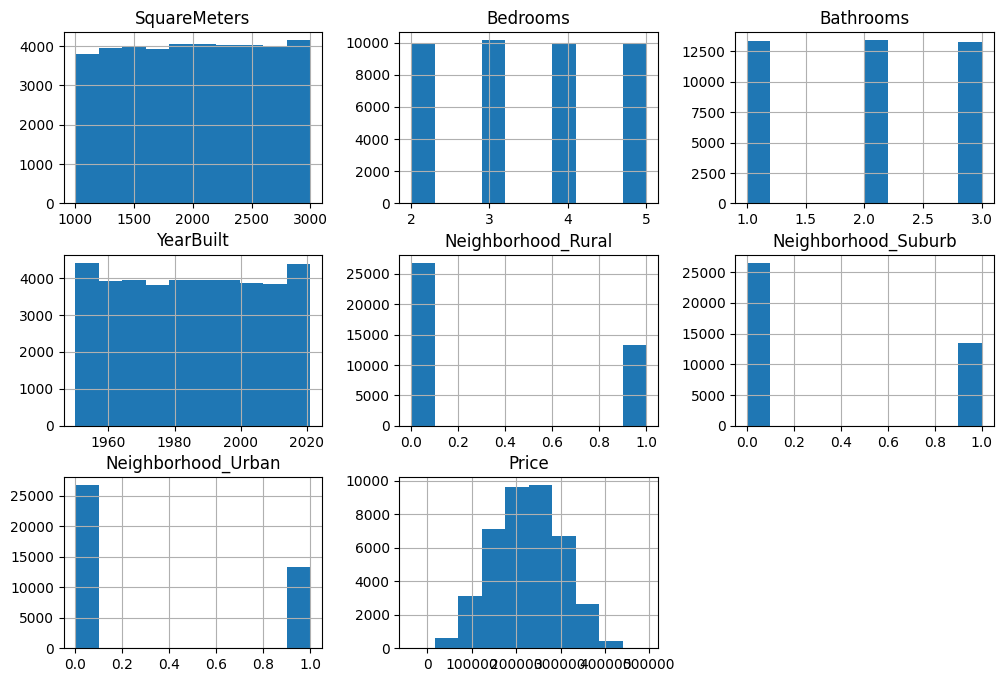

In [86]:
train_data = X_train.join(y_train)
train_data.hist(figsize=(12,8))

In [87]:
train_data.describe()

,SquareMeters,Bedrooms,Bathrooms,YearBuilt,Neighborhood_Rural,Neighborhood_Suburb,Neighborhood_Urban,Price
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,2008.140800,3.497325,1.998025,1985.417025,0.330900,0.337025,0.332075,225046.793242
std,575.855612,1.116568,0.815314,20.693758,0.470543,0.472699,0.470964,76164.811824
min,1000.000000,2.000000,1.000000,1950.000000,0.000000,0.000000,0.000000,-36588.165397
25%,1513.000000,3.000000,1.000000,1967.000000,0.000000,0.000000,0.000000,170005.503073
50%,2011.000000,3.000000,2.000000,1985.000000,0.000000,0.000000,0.000000,225401.812480
75%,2508.000000,4.000000,3.000000,2003.000000,1.000000,1.000000,1.000000,279643.319821
max,2999.000000,5.000000,3.000000,2021.000000,1.000000,1.000000,1.000000,492195.259972


<Axes: >

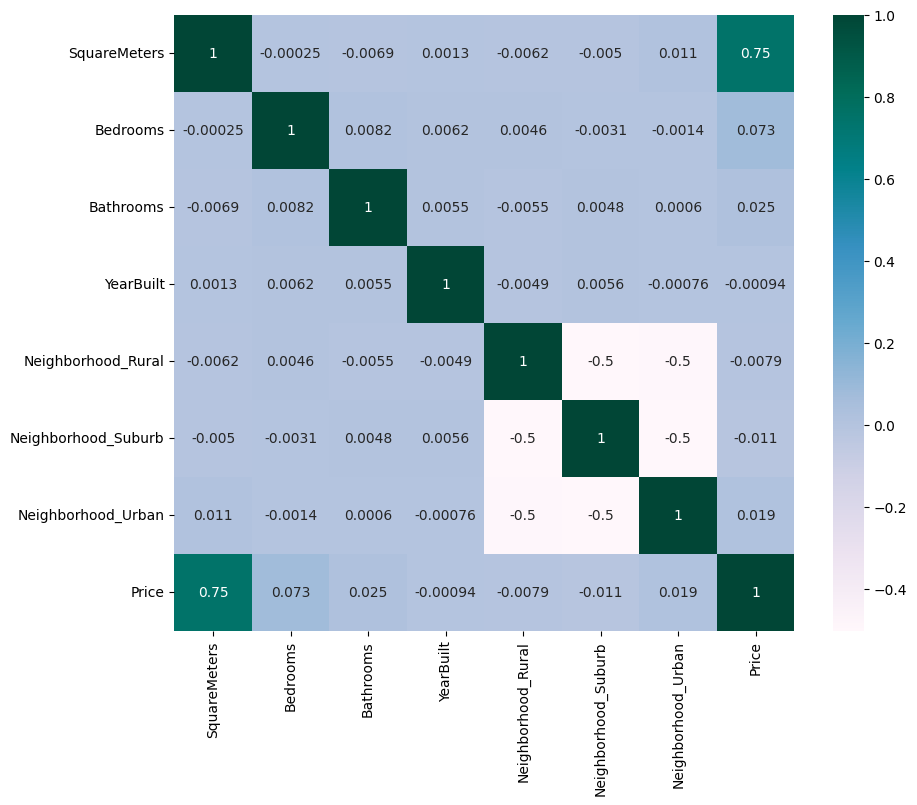

In [88]:
plt.figure(figsize=(10,8))
sns.heatmap(train_data.corr(), annot=True, cmap='PuBuGn')

Another interesting feature could be studied as well; square meters per room (bedroom/bathroom).

<Axes: >

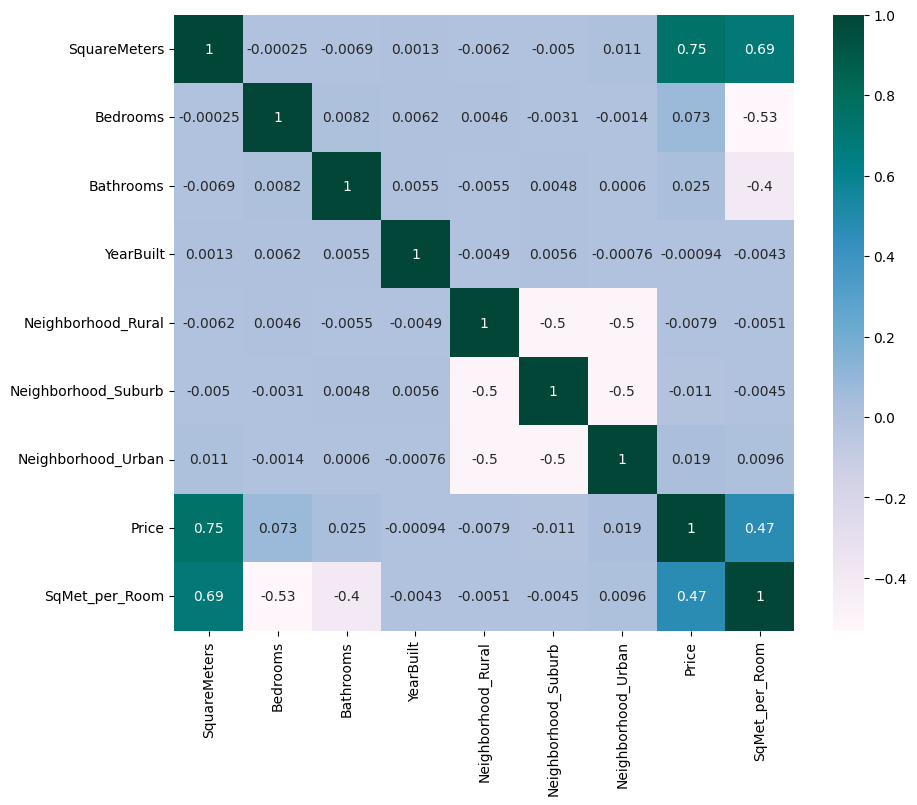

In [89]:
train_data['SqMet_per_Room']=train_data['SquareMeters']/(train_data['Bedrooms']+train_data['Bathrooms'])
plt.figure(figsize=(10,8))
sns.heatmap(train_data.corr(), annot=True, cmap='PuBuGn')

In [90]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

rf=RandomForestRegressor()
rf.fit(X_train,y_train)

#reg=LinearRegression()
#reg.fit(X_train,y_train)

RandomForestRegressor()

In [91]:
rf.score(X_test,y_test)
#reg.score(X_test,y_test)

0.5122841561798341

As an attempt to have a better score, i applied a grid search approach,which explores a range of hyperparameter combinations for my random forest regression model. By evaluating each combination using cross-validation and the chosen scoring metric (NMSE in this case)

In [92]:
from sklearn.model_selection import GridSearchCV
forest = RandomForestRegressor()

param_grid = {
    "n_estimators": [100, 200, 300],
    "min_samples_split": [2, 4],
    "max_depth": [None, 4, 8]
}
grid_search=GridSearchCV(forest, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [93]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=8, min_samples_split=4, n_estimators=300)

In [94]:
grid_search.best_estimator_.score(X_test,y_test)

0.5641878370572586

Same thing will be applied with a linear regression model. I used the root mean squared error metric this time.

In [173]:
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
linreg = LinearRegression()
param_grid2 = {
    "copy_X": [True, False],
    "fit_intercept": [True, False],
    "n_jobs": [-1],
    "positive": [True, False]
}

rmse_scorer = make_scorer(lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred)), greater_is_better=False)

grid_search2 = GridSearchCV(linreg, param_grid2, cv=5, scoring=rmse_scorer, return_train_score=True)
grid_search2.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False], 'n_jobs': [-1],
                         'positive': [True, False]},
             return_train_score=True,
             scoring=make_scorer(<lambda>, greater_is_better=False))

In [174]:
grid_search2.best_params_

{'copy_X': True, 'fit_intercept': False, 'n_jobs': -1, 'positive': True}

In [175]:
linreg = LinearRegression(copy_X=True, fit_intercept=False, n_jobs=-1, positive=True)
linreg.fit(X_train,y_train)
linreg.score(X_test,y_test)

0.5679750259647803

In [209]:
nouvelle_maison= {
    'SquareMeters': 2500,
    'Bedrooms': 4,
    'Bathrooms': 2,
    'YearBuilt': 2017,
    'Neighborhood_Rural': 0,
    'Neighborhood_Suburb': 0,
    'Neighborhood_Urban': 1,
}
test_maison = pd.DataFrame([nouvelle_maison])
#test_prix=grid_search.best_estimator_.predict(test_maison) # using randomforest
test_prix=linreg.predict(test_maison)
print('Selon les données fournies, la valeur prédite pour la nouvelle maison est : {}€'.format(round(test_prix.item(), 2)))

Selon les données fournies, la valeur prédite pour la nouvelle maison est : 277625.72€
